# 8-1-1

+ 11个健康妇女的每日能量摄入如下：$[5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770]KJ$  
这些值和推荐值7725有显著差别么？

In [1]:
data_1 = np.array([5260,5470,5640,6180,6390,6515,6805,7515,7515,8230,8770])
data_1

array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])

In [2]:
from scipy import stats as st
import seaborn as sns

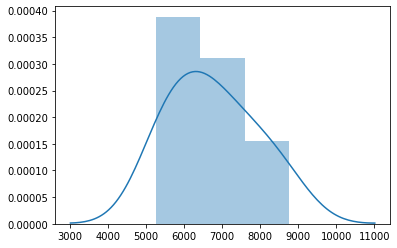

In [3]:
sns.distplot(data_1)

In [4]:
st.ttest_1samp(data_1, 7725)

Ttest_1sampResult(statistic=-2.8207540608310198, pvalue=0.018137235176105812)

In [6]:
st.wilcoxon(data_1 - 7725)

WilcoxonResult(statistic=8.0, pvalue=0.026157182329284684)

# 8-1-2

+ 在一个诊所中，15个懒惰的病人体重是$[76, 101, 66, 72, 88, 82, 79, 73, 76, 85, 75, 64, 76, 81, 86]kg$, 15个经常运动的病人的体重是$[64, 65, 56, 62, 59, 76, 66, 82, 91, 57, 92, 80, 82, 67, 54]kg$  
+ 懒惰的病人更重么？
+ 两个样本是正态性么？

In [8]:
data2 = np.array([76,101,66,72,88,82,79,73,76,85,75,64,76,81,86])
data3 = np.array([64,65,56,62,59,76,66,82,91,57,92,80,82,67,54])
list(map(np.mean, [data2, data3]))

[78.66666666666667, 70.2]

In [9]:
st.ttest_ind(data2, data3)

Ttest_indResult(statistic=2.0968730776547093, pvalue=0.04516066585880743)

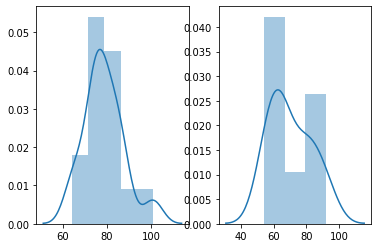

In [10]:
fig, axes = plt.subplots(1, 2)
sns.distplot(data2, ax=axes[0])
sns.distplot(data3, ax=axes[1])

In [11]:
st.shapiro(data2) #W检验
st.shapiro(data3)

(0.9536902904510498, 0.5843229293823242)

(0.915144681930542, 0.16237035393714905)

$H_0: np.mean(data2) < np.mean(data3)$  
$H_0: np.mean(data2) >= np.mean(data3)$

In [27]:
# tval, p = st.mannwhitneyu(data2, data3, alternative='two-sided')
tval, p = st.mannwhitneyu(data2, data3, alternative=None) #非参数检验
tval, p

(69.5, 0.03870097237902591)

# 8-2

In [32]:
data4 = DataFrame([['Control', 4.17],
['Control', 5.58],
['Control', 5.18],
['Control', 6.11],
['Control', 4.5],
['Control', 4.61],
['Control', 5.17],
['Control', 4.53],
['Control', 5.33],
['Control', 5.14],
['TreatmentA', 4.81],
['TreatmentA', 4.17],
['TreatmentA', 4.41],
['TreatmentA', 3.59],
['TreatmentA', 5.87],
['TreatmentA', 3.83],
['TreatmentA', 6.03],
['TreatmentA', 4.89],
['TreatmentA', 4.32],
['TreatmentA', 4.69],
['TreatmentB', 6.31],
['TreatmentB', 5.12],
['TreatmentB', 5.54],
['TreatmentB', 5.5],
['TreatmentB', 5.37],
['TreatmentB', 5.29],
['TreatmentB', 4.92],
['TreatmentB', 6.15],
['TreatmentB', 5.8],
['TreatmentB', 5.26]], columns=['group', 'weight'])
data4

,group,weight
0,Control,4.17
1,Control,5.58
2,Control,5.18
3,Control,6.11
4,Control,4.50
5,Control,4.61
6,Control,5.17
7,Control,4.53
8,Control,5.33
9,Control,5.14


## 1-1

In [39]:
control = data4.loc[data4.group == 'Control', 'weight']
t_a = data4.loc[data4.group == 'TreatmentA', 'weight']
t_b = data4.loc[data4.group == 'TreatmentB', 'weight']

In [40]:
st.f_oneway(control, t_a, t_b)

F_onewayResult(statistic=4.846087862380136, pvalue=0.0159099583256229)

## 1-2

In [43]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [46]:
formula = 'weight ~ C(group)'
lm = ols(formula, data=data4).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(group),2.0,3.76634,1.883170,4.846088,0.01591
Residual,27.0,10.49209,0.388596,NaN,NaN


## 2-1

In [41]:
from statsmodels.stats.multicomp import MultiComparison, pairwise_tukeyhsd

In [49]:
pairwise_tukeyhsd(data4['weight'], data4['group']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Control,TreatmentA,-0.371,0.3921,-1.0621,0.3201,False
Control,TreatmentB,0.494,0.198,-0.1971,1.1851,False
TreatmentA,TreatmentB,0.865,0.012,0.1739,1.5561,True


## 2-2

group1,group2,meandiff,p-adj,lower,upper,reject
Control,TreatmentA,-0.371,0.3921,-1.0621,0.3201,False
Control,TreatmentB,0.494,0.198,-0.1971,1.1851,False
TreatmentA,TreatmentB,0.865,0.012,0.1739,1.5561,True


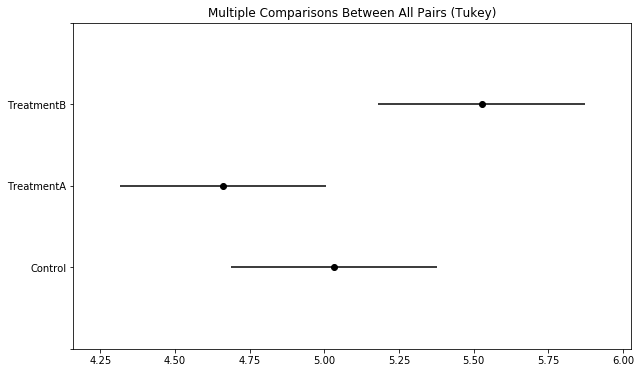

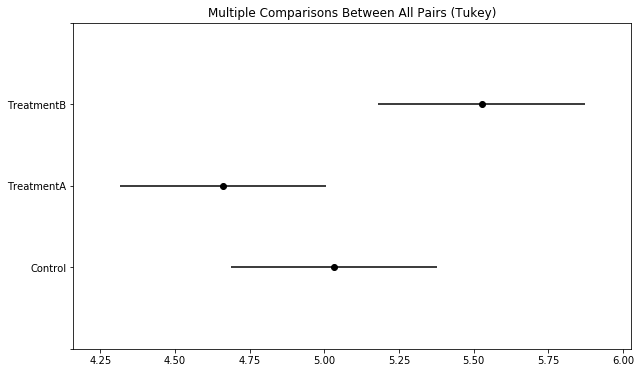

In [70]:
mc = MultiComparison(data4['weight'], data4['group'])
mc.tukeyhsd().summary()
mc.tukeyhsd().plot_simultaneous()

In [63]:
mc.allpairtest(st.ttest_ind, method='b')[0]
mc.allpairtest(st.ttest_ind, method='h')[0]

group1,group2,stat,pval,pval_corr,reject
Control,TreatmentA,1.1913,0.249,0.7471,False
Control,TreatmentB,-2.134,0.0469,0.1406,False
TreatmentA,TreatmentB,-3.0101,0.0075,0.0226,True


group1,group2,stat,pval,pval_corr,reject
Control,TreatmentA,1.1913,0.249,0.249,False
Control,TreatmentB,-2.134,0.0469,0.0937,False
TreatmentA,TreatmentB,-3.0101,0.0075,0.0226,True


## 3-1

In [71]:
st.kruskal(control, t_a, t_b)

KruskalResult(statistic=7.988228749443715, pvalue=0.018423755731471966)